<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Introduction to Data Analytics and Geostatistics and Spatial Data Analytics Courses


## GeostatsPy: Estimation vs. Simulation Demonstration 


### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

This workflow build useful visualizations to demonstrate the difference between spatial estimation and simulation.

#### Estimation vs. Simulation

Estimation: 

* honors local data 
* locally accurate, primary goal of estimation is 1 estimate! 
* too smooth, appropriate for visualizing trends 
* too smooth, inappropriate for flow simulation 
* one model, no assessment of global uncertainty 

Simulation: 

* honors local data 
* sacrifices local accuracy, reproduces histogram 
* honors spatial variability, appropriate for flow simulation 
* alternative realizations, change random number seed 
* many models (realizations), assessment of global uncertainty

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the data file to your working directory.  They are available here:

* Tabular data - [sample_data.csv](https://git.io/fh0CW) at https://git.io/fh0CW.

There are exampled below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

#### Load the required libraries

The following code loads the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
plt.rc('axes', axisbelow=True)

import geostatspy.geostats as geostats
import geostatspy.GSLIB as GSLIB

from IPython.utils import io

#### Simulation Parameters, Data with Reference Distribution (values outside AOI)

* we need a full distribution of values outside the AOI to support the distribution transformation of sequential Gaussian simulation

* while the data will inform the distribution transformation, they are outside the range of spatial continuity and will not locally condition the model

In [2]:
nx = 100; ny = 1; xsiz = 10.0; ysiz = 10.0; xmn = 5.0; ymn = 5.0; nxdis = 1; nydis = 1
ndmin = 0; ndmax = 20; radius = 2000; skmean = 0; tmin = -99999; tmax = 99999; nreal = 10

df = pd.DataFrame(np.vstack([np.full(1000,-9999),np.random.normal(size=1000),
                np.random.normal(loc=1000,scale=200,size=1000)]).T, columns= ['X','Y','Lithium'])

df.loc[0,'X'] = 105; df.loc[0,'Y'] = 5.0; df.loc[0,'Lithium'] = 800
df.loc[1,'X'] = 505; df.loc[1,'Y'] = 5.0; df.loc[1,'Lithium'] = 1000
df.loc[2,'X'] = 905; df.loc[2,'Y'] = 5.0; df.loc[2,'Lithium'] = 950

df.head()

,X,Y,Lithium
0,105.0,5.000000,800.000000
1,505.0,5.000000,1000.000000
2,905.0,5.000000,950.000000
3,-9999.0,-0.343531,1057.922844
4,-9999.0,0.425342,895.937296


#### Make Truth Model

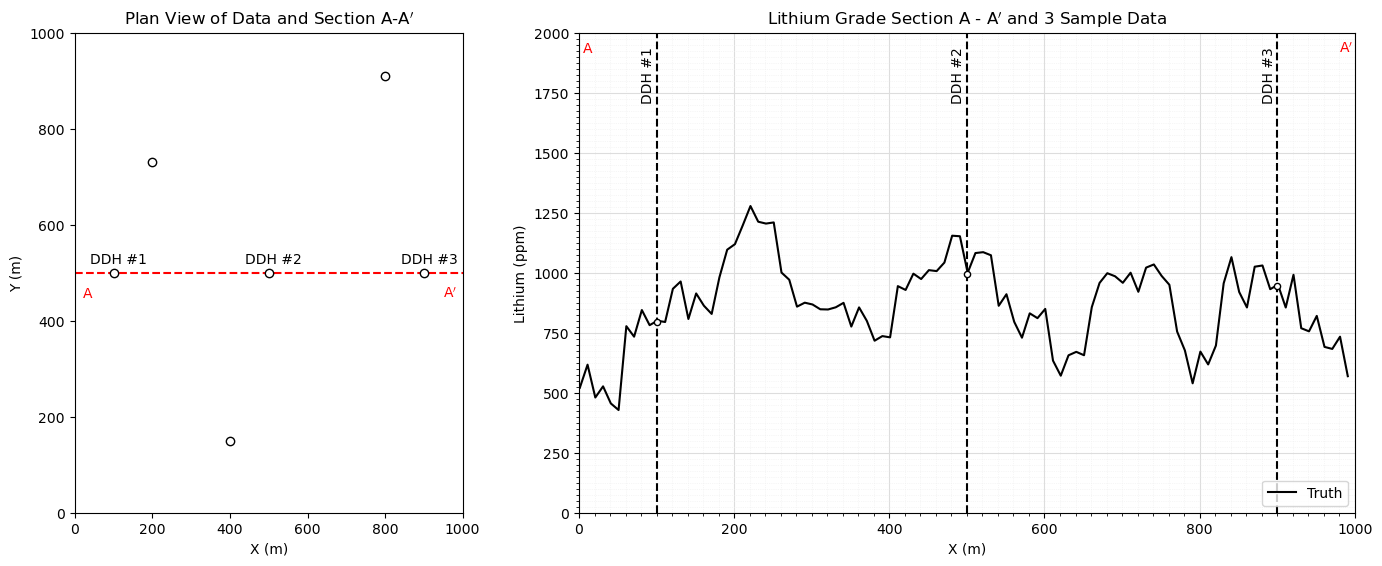

In [3]:
nreal = 1
vario_truth = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=90.0,hmaj1=100,hmin1=5)

fig = plt.figure()
grid_spec = gridspec.GridSpec(ncols = 2,nrows=1,width_ratios=[1, 2])

ax0 = fig.add_subplot(grid_spec[0])

ax0.scatter([100,500,900,400,200,800],[500,500,500,150,730,910],color='white',edgecolor='black',zorder=10)
plt.plot([0,1000],[500,500],ls='--',color='red',zorder=1)
plt.annotate(r'DDH #1',(40,520)); plt.annotate(r'DDH #2',(440,520)) 
plt.annotate(r'DDH #3',(840,520)) 
plt.annotate(r'A',(20,450),color='red'); plt.annotate(r'A$^\prime$',(950,450),color='red')  

plt.xlim([0,1000]); plt.ylim([0,1000]); plt.xlabel('X (m)'); plt.ylabel('Y (m)'); plt.title('Plan View of Data and Section A-A$^\prime$')



ax1 = fig.add_subplot(grid_spec[1])
for i in range(0, nreal):
    with io.capture_output() as captured:
        truth = geostats.sgsim(df,'X','Y','Lithium',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=2000.0,ltail=1,ltpar=0.0,utail=1,utpar=2000,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73067,
            ndmin=ndmin,ndmax=ndmax,nodmax=10,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=0,colocorr=0.0,sec_map=0,vario=vario_truth)
    
    ax1.plot(np.arange(1,(nx*xsiz),xsiz),truth[0],color='black',label='Truth',zorder=1)
        
plt.annotate(r'DDH #1',(80,1720),rotation = 90); plt.annotate(r'DDH #2',(480,1720),rotation = 90) 
plt.annotate(r'DDH #3',(880,1720),rotation = 90) 

plt.annotate(r'A',(5,1920),color='red'); plt.annotate(r'A$^\prime$',(980,1920),color='red') 

plt.scatter(500,995,s=20,color='white',edgecolor='black',zorder=10); plt.scatter(100,795,s=20,color='white',edgecolor='black',zorder=10)
plt.scatter(900,945,s=20,color='white',edgecolor='black',zorder=10)

plt.plot([100,100],[0,2000],color='black',ls='--'); plt.plot([900,900],[0,2000],color='black',ls='--')
plt.plot([500,500],[0,2000],color='black',ls='--')
  
plt.legend(loc='lower right')    

plt.ylim([0,2000]); plt.xlim([0,1000]) 
gca = plt.gca()
gca.xaxis.set_minor_locator(AutoMinorLocator(10))
gca.yaxis.set_minor_locator(AutoMinorLocator(10))
gca.grid(which='major', color='#DDDDDD', linewidth=0.8); gca.grid(which='minor',color='#EEEEEE', linestyle=':', linewidth=0.5)
plt.xlabel('X (m)'); plt.ylabel('Lithium (ppm)'); plt.title('Lithium Grade Section A - A$^\prime$ and 3 Sample Data')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Estimation Model

We only estimate in 1D along the section and only use the 3 indicated data

  Estimated   100 blocks 
      average   903.7625  variance  1057.81165624992


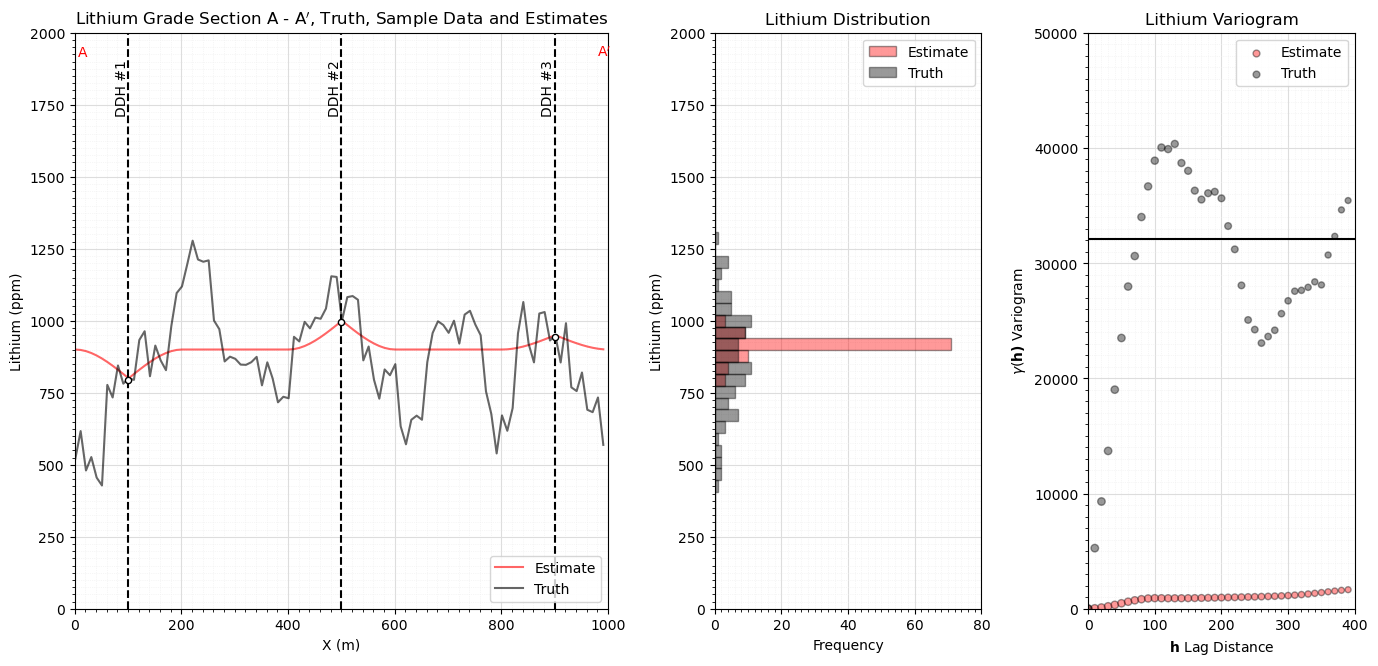

In [4]:
fig = plt.figure()
grid_spec = gridspec.GridSpec(ncols = 3,nrows=1,width_ratios=[2, 1, 1])

ax0 = fig.add_subplot(grid_spec[0])

nreal = 20

estimate, est_var = geostats.kb2d(df,'X','Y','Lithium',tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,nxdis=1,nydis=1,
         ndmin=0,ndmax=10,radius=500,ktype=0,skmean=900,vario=vario_truth)
    
ax0.plot(np.arange(1,(nx*xsiz),xsiz),estimate[0],color='red',alpha=0.6,label='Estimate',zorder=1)
ax0.plot(np.arange(1,(nx*xsiz),xsiz),truth[0],color='black',alpha=0.6,label='Truth',zorder=1)
    
plt.annotate(r'DDH #1',(75,1720),rotation = 90); plt.annotate(r'DDH #2',(475,1720),rotation = 90) 
plt.annotate(r'DDH #3',(875,1720),rotation = 90) 

plt.annotate(r'A',(5,1920),color='red'); plt.annotate(r'A$^\prime$',(980,1920),color='red') 

plt.scatter(500,995,s=20,color='white',edgecolor='black',zorder=10); plt.scatter(100,795,s=20,color='white',edgecolor='black',zorder=10)
plt.scatter(900,945,s=20,color='white',edgecolor='black',zorder=10)

plt.plot([100,100],[0,2000],color='black',ls='--'); plt.plot([900,900],[0,2000],color='black',ls='--')
plt.plot([500,500],[0,2000],color='black',ls='--')
    
plt.legend(loc='lower right')    
    
plt.ylim([0,2000]); plt.xlim([0,1000]) 
gca = plt.gca()
gca.xaxis.set_minor_locator(AutoMinorLocator(10))
gca.yaxis.set_minor_locator(AutoMinorLocator(10))
gca.grid(which='major', color='#DDDDDD', linewidth=0.8); gca.grid(which='minor',color='#EEEEEE', linestyle=':', linewidth=0.5)
plt.xlabel('X (m)'); plt.ylabel('Lithium (ppm)'); plt.title('Lithium Grade Section A - A$^\prime$, Truth, Sample Data and Estimates')

ax1 = fig.add_subplot(grid_spec[1])

ax1.hist(estimate[0],bins=np.linspace(200,1800,40),color='red',alpha=0.4,edgecolor='black',label='Estimate',orientation='horizontal')
ax1.hist(truth[0],bins=np.linspace(200,1800,40),color='black',alpha=0.4,edgecolor='black',label='Truth',orientation='horizontal')
plt.ylabel('Lithium (ppm)'); plt.xlabel('Frequency'); plt.title('Lithium Distribution')
plt.ylim([0,2000]); plt.xlim([0,80]); plt.grid()

gca = plt.gca()
gca.xaxis.set_minor_locator(AutoMinorLocator(10))
gca.yaxis.set_minor_locator(AutoMinorLocator(10))
gca.grid(which='major', color='#DDDDDD', linewidth=0.8); gca.grid(which='minor',color='#EEEEEE', linestyle=':', linewidth=0.5)

plt.legend(loc='upper right')    

ax2 = fig.add_subplot(grid_spec[2])

truth_series = pd.Series(truth[0]); estimate_series = pd.Series(estimate[0])

gamma_estimate = []; gamma_truth = []; num_pairs_all = []
for ilag in range(0,40):
    num_pairs_all.append(float(len((truth_series - truth_series.shift(ilag)).dropna())))
    gamma_truth.append(np.average(np.square((truth_series - truth_series.shift(ilag)).dropna()))*0.5)  
    gamma_estimate.append(np.average(np.square((estimate_series - estimate_series.shift(ilag)).dropna()))*0.5)  

lithium_var = np.var(truth[0])
scatter = ax2.scatter(np.arange(0,40)*xsiz,gamma_estimate,s=np.array(num_pairs_all)*0.3,color='red',alpha=0.4,edgecolor='black',label='Estimate')
plt.scatter(np.arange(0,40)*xsiz,gamma_truth,s=np.array(num_pairs_all)*0.3,color='black',alpha=0.4,edgecolor='black',label='Truth')
plt.plot([0,400],[lithium_var,lithium_var],color='black')
plt.xlim([0,400]); plt.ylim([0,50000]); plt.title('Lithium Variogram')
plt.xlabel(r'$\bf{h}$ Lag Distance'); plt.ylabel(r'$\gamma(\bf{h})$ Variogram')

gca = plt.gca()
gca.xaxis.set_minor_locator(AutoMinorLocator(10))
gca.yaxis.set_minor_locator(AutoMinorLocator(10))
gca.grid(which='major', color='#DDDDDD', linewidth=0.8); gca.grid(which='minor',color='#EEEEEE', linestyle=':', linewidth=0.5)

plt.legend(loc='upper right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.3, hspace=0.2); plt.show()

#### Simulation Models

We only simulate in 1D along the section and only use the 3 indicated data

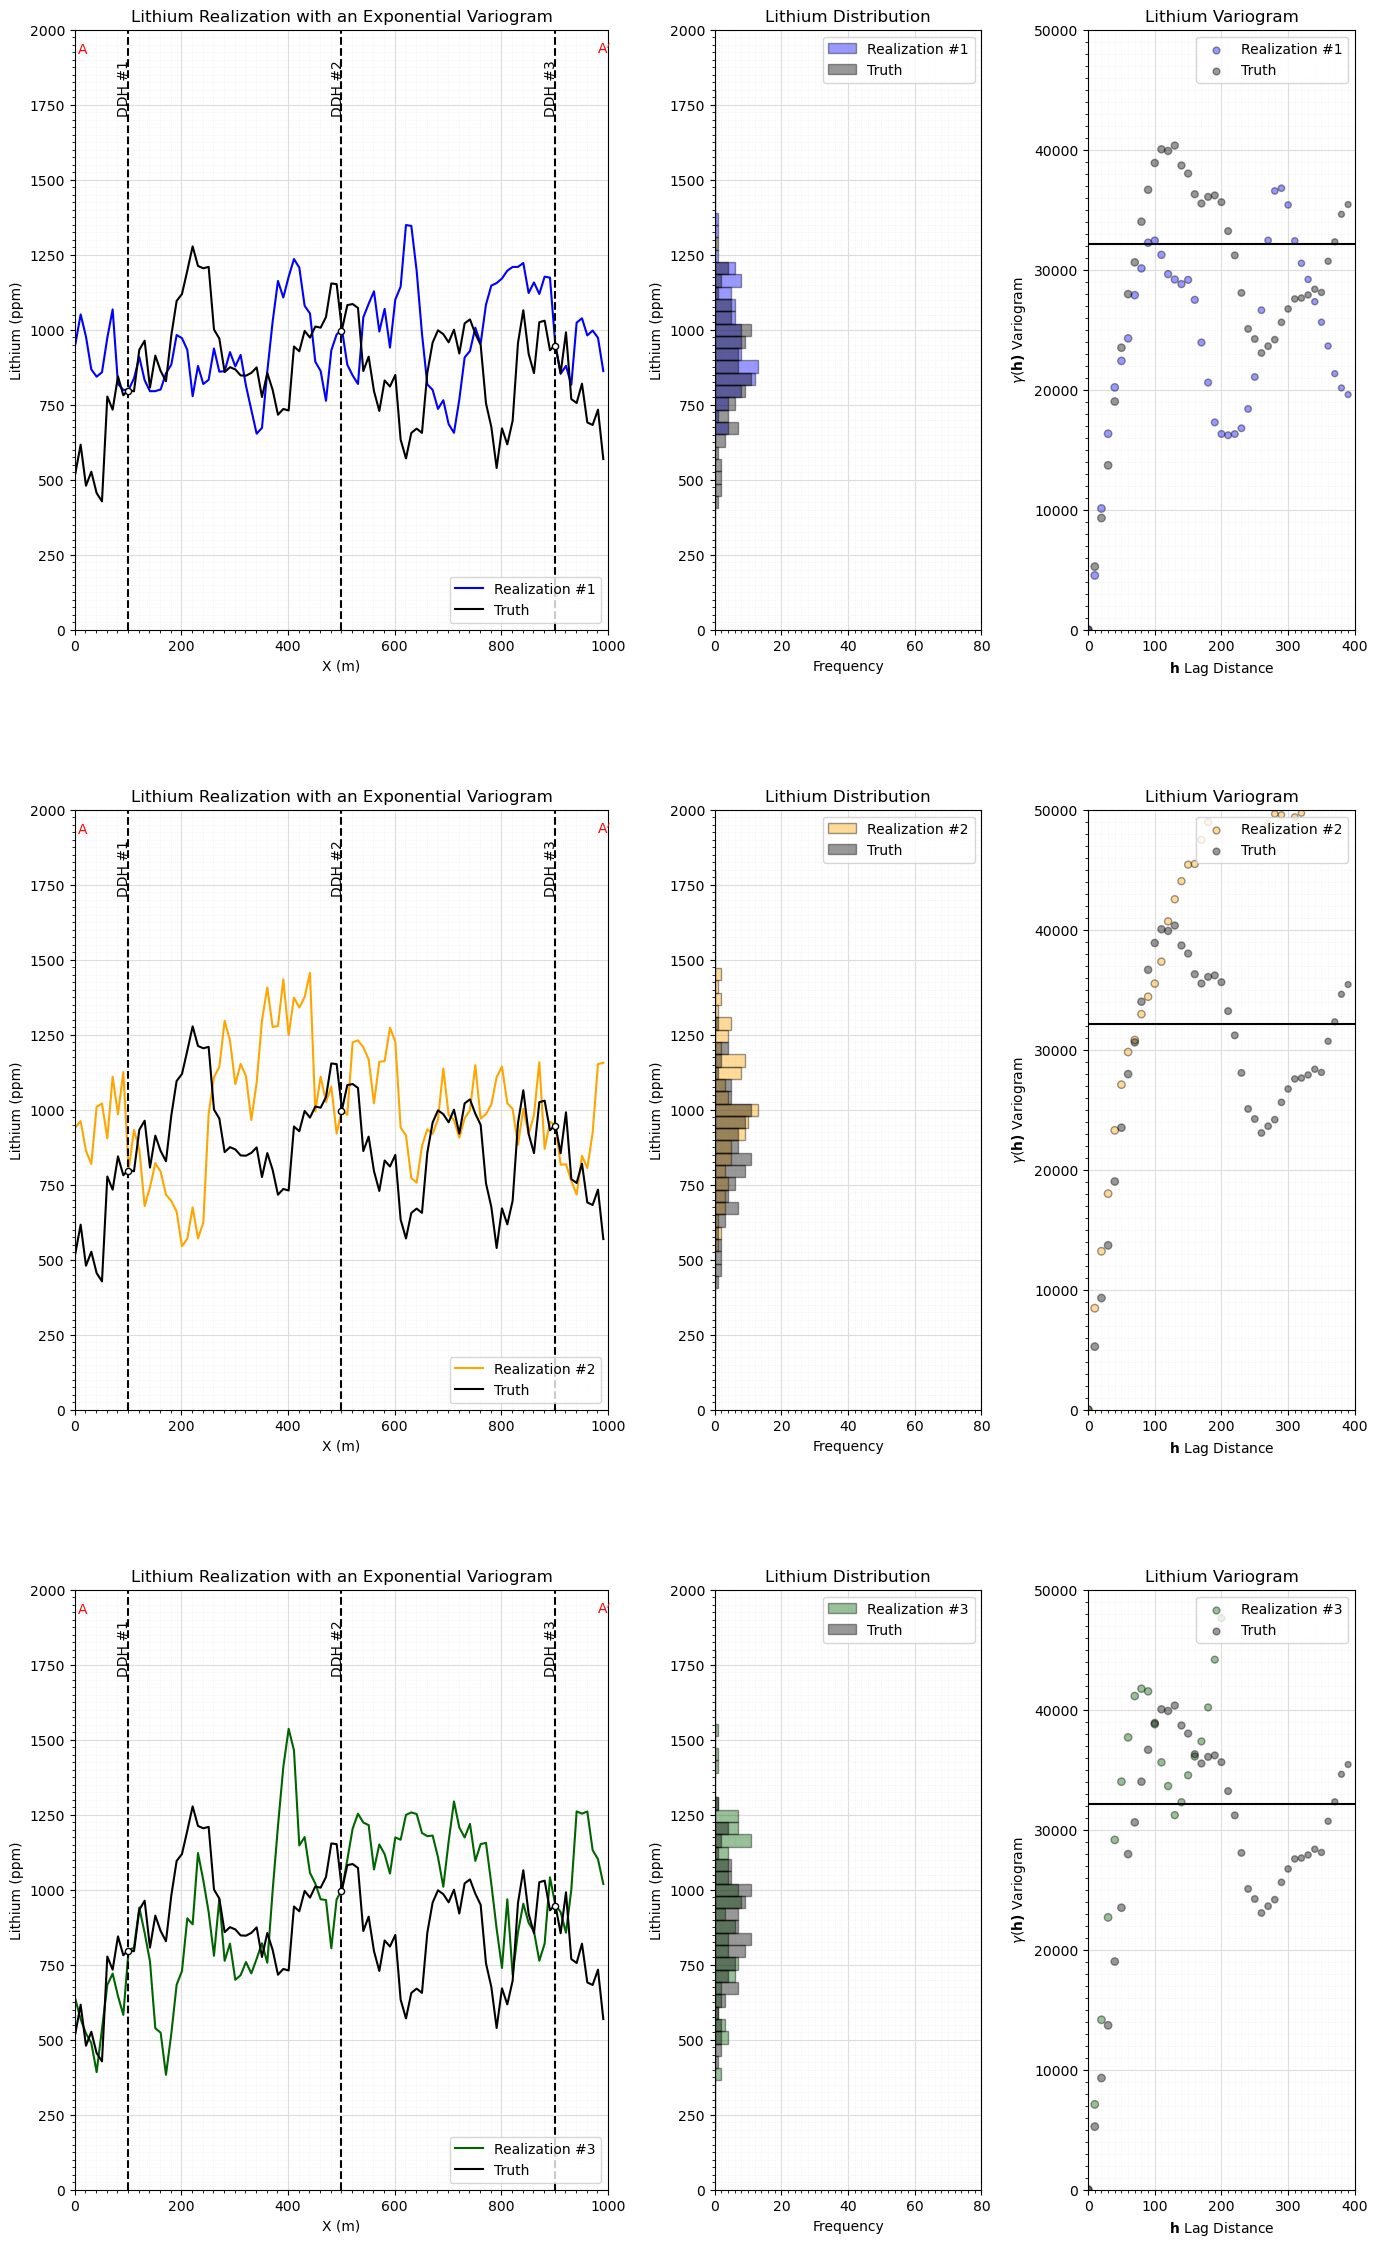

In [5]:
nreal = 3

color = ['blue','orange','darkgreen']

fig = plt.figure()
grid_spec = gridspec.GridSpec(ncols = 3,nrows=3,width_ratios=[2, 1, 1])

for i in range(0, nreal):

    j = i*3
    ax = fig.add_subplot(grid_spec[j])
    with io.capture_output() as captured:
        sim = geostats.sgsim(df,'X','Y','Lithium',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=2000.0,ltail=1,ltpar=0.0,utail=1,utpar=2000,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73074+i,
            ndmin=ndmin,ndmax=ndmax,nodmax=10,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=0,colocorr=0.0,sec_map=0,vario=vario_truth);

    ax.plot(np.arange(1,(nx*xsiz),xsiz),sim[0],color=color[i],label='Realization #' + str(i+1),zorder=1)
    ax.plot(np.arange(1,(nx*xsiz),xsiz),truth[0],color='black',label='Truth',zorder=1)
    
    plt.annotate(r'DDH #1',(80,1720),rotation = 90); plt.annotate(r'DDH #2',(480,1720),rotation = 90) 
    plt.annotate(r'DDH #3',(880,1720),rotation = 90) 
    
    plt.annotate(r'A',(5,1920),color='red'); plt.annotate(r'A$^\prime$',(980,1920),color='red') 
    
    plt.scatter(500,995,s=20,color='white',edgecolor='black',zorder=10); plt.scatter(100,795,s=20,color='white',edgecolor='black',zorder=10)
    plt.scatter(900,945,s=20,color='white',edgecolor='black',zorder=10)
    
    plt.plot([100,100],[0,2000],color='black',ls='--'); plt.plot([900,900],[0,2000],color='black',ls='--')
    plt.plot([500,500],[0,2000],color='black',ls='--')
     
    plt.legend(loc='lower right') 
        
    plt.ylim([0,2000]); plt.xlim([0,1000]) 
    gca = plt.gca()
    gca.xaxis.set_minor_locator(AutoMinorLocator(10))
    gca.yaxis.set_minor_locator(AutoMinorLocator(10))
    gca.grid(which='major', color='#DDDDDD', linewidth=0.8); gca.grid(which='minor',color='#EEEEEE', linestyle=':', linewidth=0.5)
    plt.xlabel('X (m)'); plt.ylabel('Lithium (ppm)'); plt.title('Lithium Realization with an Exponential Variogram')

    h = i*3+1
    ax2 = fig.add_subplot(grid_spec[h])  

    ax2.hist(sim[0],bins=np.linspace(200,1800,40),color=color[i],alpha=0.4,edgecolor='black',label='Realization #' + str(i+1),orientation='horizontal')
    ax2.hist(truth[0],bins=np.linspace(200,1800,40),color='black',alpha=0.4,edgecolor='black',label='Truth',orientation='horizontal')
    plt.ylabel('Lithium (ppm)'); plt.xlabel('Frequency'); plt.title('Lithium Distribution')
    plt.ylim([0,2000]); plt.xlim([0,80]); plt.grid()
    
    gca = plt.gca()
    gca.xaxis.set_minor_locator(AutoMinorLocator(10))
    gca.yaxis.set_minor_locator(AutoMinorLocator(10))
    gca.grid(which='major', color='#DDDDDD', linewidth=0.8); gca.grid(which='minor',color='#EEEEEE', linestyle=':', linewidth=0.5)
    
    plt.legend(loc='upper right')   
   
    g = i*3+2
    ax2 = fig.add_subplot(grid_spec[g])

    truth_series = pd.Series(truth[0]); sim_series = pd.Series(sim[0])
    
    gamma_sim = []; gamma_truth = []; num_pairs_all = []
    for ilag in range(0,40):
        num_pairs_all.append(float(len((truth_series - truth_series.shift(ilag)).dropna())))
        gamma_truth.append(np.average(np.square((truth_series - truth_series.shift(ilag)).dropna()))*0.5)  
        gamma_sim.append(np.average(np.square((sim_series - sim_series.shift(ilag)).dropna()))*0.5)  
    
    lithium_var = np.var(truth[0])
    scatter = ax2.scatter(np.arange(0,40)*xsiz,gamma_sim,s=np.array(num_pairs_all)*0.3,color=color[i],alpha=0.4,edgecolor='black',label='Realization #' + str(i+1))
    plt.scatter(np.arange(0,40)*xsiz,gamma_truth,s=np.array(num_pairs_all)*0.3,color='black',alpha=0.4,edgecolor='black',label='Truth')
    plt.plot([0,400],[lithium_var,lithium_var],color='black')
    plt.xlim([0,400]); plt.ylim([0,50000]); plt.title('Lithium Variogram')
    plt.xlabel(r'$\bf{h}$ Lag Distance'); plt.ylabel(r'$\gamma(\bf{h})$ Variogram')
    
    gca = plt.gca()
    gca.xaxis.set_minor_locator(AutoMinorLocator(10))
    gca.yaxis.set_minor_locator(AutoMinorLocator(10))
    gca.grid(which='major', color='#DDDDDD', linewidth=0.8); gca.grid(which='minor',color='#EEEEEE', linestyle=':', linewidth=0.5)
    
    plt.legend(loc='upper right')
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=4.5, wspace=0.3, hspace=0.3); plt.show()

#### Many Realizations

TypeError: sgsim() missing 1 required positional argument: 'vario'

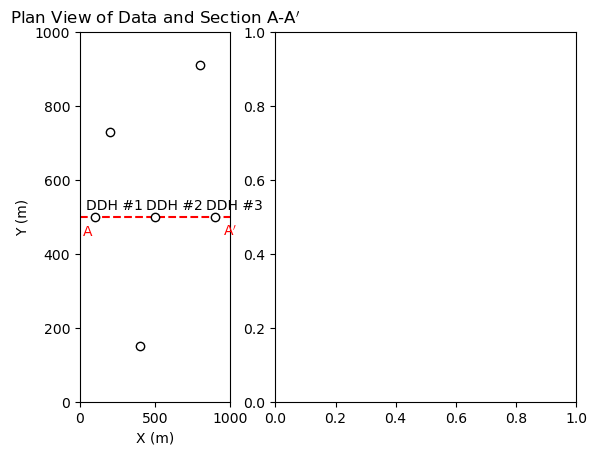

In [7]:
nreal = 50

fig = plt.figure()
grid_spec = gridspec.GridSpec(ncols = 2,nrows=1,width_ratios=[1, 2])

ax0 = fig.add_subplot(grid_spec[0])

ax0.scatter([100,500,900,400,200,800],[500,500,500,150,730,910],color='white',edgecolor='black',zorder=10)
plt.plot([0,1000],[500,500],ls='--',color='red',zorder=1)
plt.annotate(r'DDH #1',(40,520)); plt.annotate(r'DDH #2',(440,520)) 
plt.annotate(r'DDH #3',(840,520)) 
plt.annotate(r'A',(20,450),color='red'); plt.annotate(r'A$^\prime$',(950,450),color='red')  

plt.xlim([0,1000]); plt.ylim([0,1000]); plt.xlabel('X (m)'); plt.ylabel('Y (m)'); plt.title('Plan View of Data and Section A-A$^\prime$')

ax1 = fig.add_subplot(grid_spec[1])

for i in range(0, nreal):
    with io.capture_output() as captured:
        sim_gaussian = geostats.sgsim(df,'X','Y','Lithium',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=2000.0,ltail=1,ltpar=0.0,utail=1,utpar=2000,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73074+i,
            ndmin=ndmin,ndmax=ndmax,nodmax=10,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=0,colocorr=0.0,sec_map=0);

    if i == nreal - 1:
        ax1.plot(np.arange(1,(nx*xsiz),xsiz),sim_gaussian[0],color=plt.cm.Blues(i/nreal),alpha=0.7,zorder=1,label='Realizations')
    else:
        ax1.plot(np.arange(1,(nx*xsiz),xsiz),sim_gaussian[0],color=plt.cm.Blues(i/nreal),alpha=0.7,zorder=1)  
        
ax1.plot(np.arange(1,(nx*xsiz),xsiz),truth[0],color='black',label='Truth',lw=2,zorder=10)
ax1.plot(np.arange(1,(nx*xsiz),xsiz),truth[0],color='white',lw=5,zorder=5)

plt.annotate(r'DDH #1',(75,1720),rotation = 90); plt.annotate(r'DDH #2',(475,1720),rotation = 90) 
plt.annotate(r'DDH #3',(875,1720),rotation = 90) 

plt.annotate(r'A',(5,1920),color='red'); plt.annotate(r'A$^\prime$',(980,1920),color='red') 

plt.scatter(500,995,s=20,color='white',edgecolor='black',zorder=10); plt.scatter(100,795,s=20,color='white',edgecolor='black',zorder=10)
plt.scatter(900,945,s=20,color='white',edgecolor='black',zorder=10)

plt.plot([100,100],[0,2000],color='black',ls='--'); plt.plot([900,900],[0,2000],color='black',ls='--')
plt.plot([500,500],[0,2000],color='black',ls='--')
    
plt.ylim([0,2000]); plt.xlim([0,1000]) 
gca = plt.gca()
gca.xaxis.set_minor_locator(AutoMinorLocator(10))
gca.yaxis.set_minor_locator(AutoMinorLocator(10))
gca.grid(which='major', color='#DDDDDD', linewidth=0.8); gca.grid(which='minor',color='#EEEEEE', linestyle=':', linewidth=0.5)
plt.xlabel('X (m)'); plt.ylabel('Lithium (ppm)'); plt.title('Lithium Grade Section A-A$^\prime$, Truth, Sample Data and Realizations')

plt.legend(loc='lower right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2); plt.show()

#### Comments

This was a basic demonstration of the difference between estimation and simulation with a lithium grade model. Much more could be done, I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
I hope this was helpful,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)